In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt 
# New Antecedent/Consequent objects hold universe variables and membership
# functions

(array([ 1.,  1., 12., 36., 61., 80., 66., 27., 13.,  3.]),
 array([-3.49008929, -2.85228484, -2.21448039, -1.57667594, -0.9388715 ,
        -0.30106705,  0.3367374 ,  0.97454185,  1.6123463 ,  2.25015075,
         2.8879552 ]),
 <BarContainer object of 10 artists>)

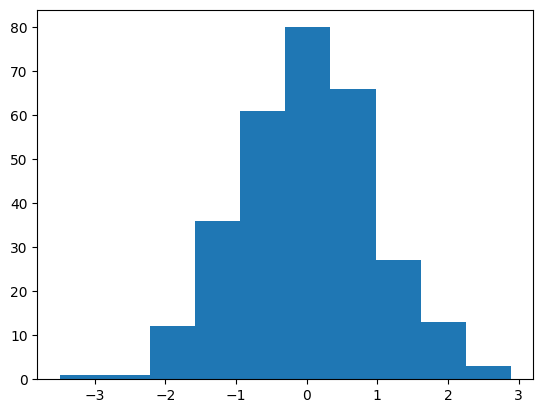

In [13]:
data_001 = np.random.normal(0,1,300)
data_002 = np.random.normal(0,1,300)
data_003 = np.random.normal(0,1,300)

plt.hist(data_003)

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

In [21]:
cas_range=np.linspace(-3,3,10)

cas_001 = ctrl.Antecedent(cas_range, 'cas_001')
cas_002 = ctrl.Antecedent(cas_range, 'cas_002')
cas_003 = ctrl.Antecedent(cas_range, 'cas_003')

# Auto-membership function population is possible with .automf(3, 5, or 7)
cas_001.automf(3)
cas_002.automf(3)
cas_003.automf(3)

osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
# tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
# tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
# tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

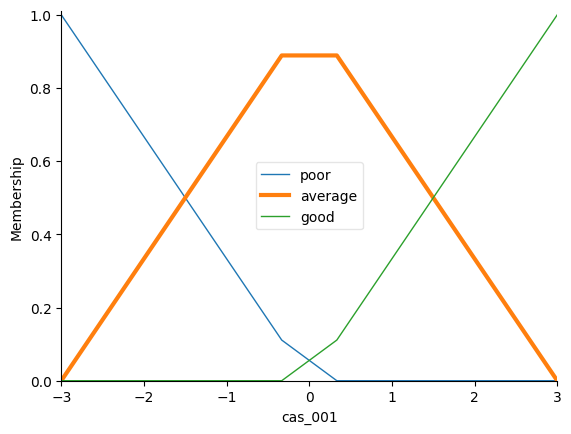

In [34]:
cas_001['average'].view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

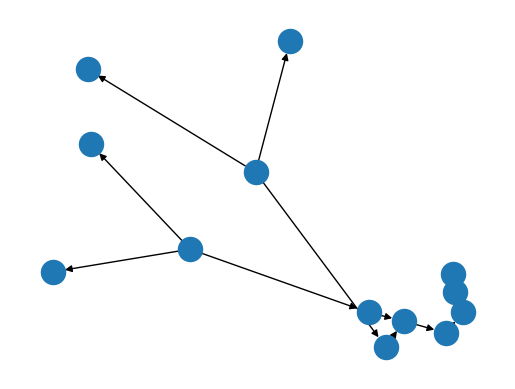

In [30]:
rule_sweet_01 = (ctrl.Rule(cas_001['good'] & cas_002['poor'], osa_sweet['good']))
rule_sweet_02 = (ctrl.Rule(cas_001['average'], osa_sweet['average']))
rule_sweet_03 = (ctrl.Rule(cas_001['poor'], osa_sweet['poor']))

rule_sweet_01.view()

In [40]:
tipping_ctrl = ctrl.ControlSystem([
    rule_sweet_01,
    # rule_sweet_02,
    rule_sweet_03
])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)


tipping.input['cas_001'] = 2
tipping.input['cas_002'] = 2
# tipping.input['cas_003'] = 1.2


# Crunch the numbers
tipping.compute()

prediction = tipping.output['osa_sweet'] 

print( prediction )
osa_sweet.view(sim=tipping)

ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.